In [15]:
import sys
import os

# Adiciona o caminho absoluto para a pasta 'src' (assumindo que 'notebooks' e 'src' estão na mesma raiz)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_dir = os.path.join(root_dir, "src")

if root_dir not in sys.path:
    sys.path.insert(0, root_dir)

from src.dataset import create_all_loaders, print_dataset_stats
from src.funcoes_augmentation import get_augmentation_fn
from src.preprocess import get_preprocess_fn
from src.visualization import visualize_dataset, visualize_mixed_dataset

In [16]:
# Diretórios de dados
train_dir = '../dados/brutos/train'
test_dir = '../dados/brutos/test'

# Lista das classes
classes = ['classe1_Vidro', 'classe2_Ceramica', 'classe3_Litico', 'classe4_Louca']

In [17]:
# Cria os DataLoaders
train_loader, val_loader, test_loader = create_all_loaders(
    train_dir=train_dir,
    test_dir=test_dir,
    classes=classes,
    preprocess_fn=get_preprocess_fn(),
    batch_size=32,
)

In [18]:
print_dataset_stats(train_loader.dataset, "Treino", classes)
print_dataset_stats(val_loader.dataset, "Validação", classes)
print_dataset_stats(test_loader.dataset, "Teste", classes)

Treino - Total de imagens: 1088
  classe1_Vidro: 272
  classe2_Ceramica: 272
  classe3_Litico: 272
  classe4_Louca: 272
Validação - Total de imagens: 232
  classe1_Vidro: 58
  classe2_Ceramica: 58
  classe3_Litico: 58
  classe4_Louca: 58
Teste - Total de imagens: 236
  classe1_Vidro: 59
  classe2_Ceramica: 59
  classe3_Litico: 59
  classe4_Louca: 59


<Figure size 864x864 with 0 Axes>

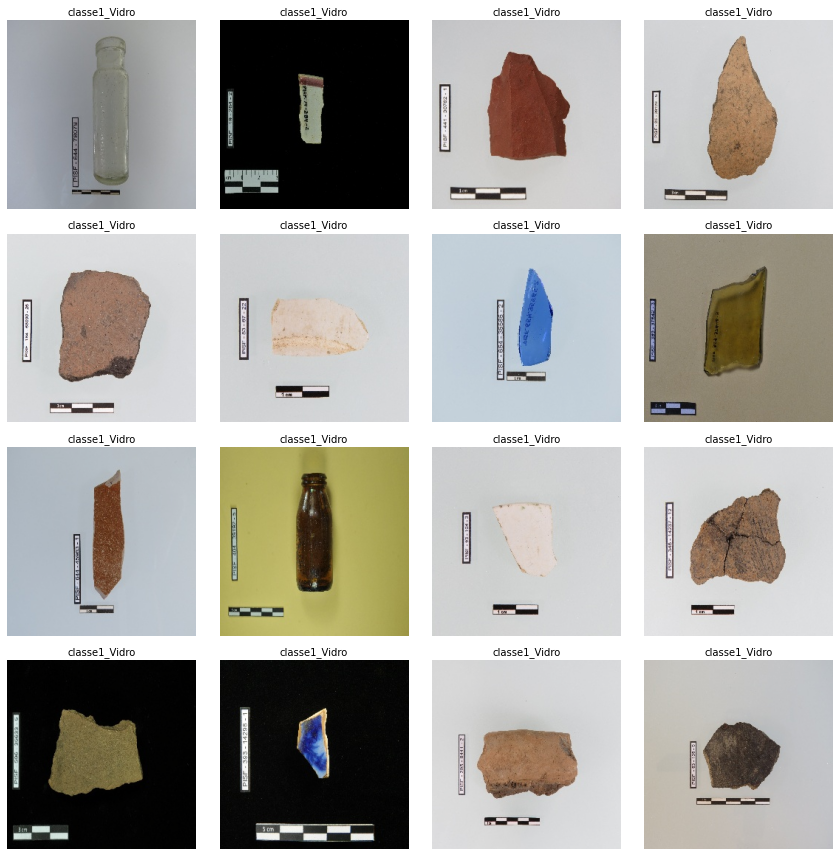

In [19]:
# Visualiza um lote de imagens do dataset de treino
visualize_dataset(train_loader, class_names=classes, num_images=16,
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [20]:
# Cria o pipeline de augmentação com os parâmetros desejados
aug_transform = get_augmentation_fn(
    img_height=256,
    img_width=256,
    rotation_degrees=30,             # Aplica rotação de até 30 graus
    apply_color_jitter=True,         # Ativa jitter de cor
    brightness=0.3,
    contrast=0.3,
    saturation=0.3,
    hue=0.1,
    apply_random_resized_crop=False, # Se quiser aplicar crop, altere para True
    apply_horizontal_flip=True,      # Ativa flip horizontal
    horizontal_flip_prob=0.5,
    apply_zoom=False,                # Se quiser aplicar zoom, altere para True e defina zoom_factor
    apply_gaussian_blur=True,        # Ativa blur gaussiano
    gaussian_blur_kernel=3,
    gaussian_blur_prob=0.5,
    gaussian_blur_sigma=1.0
)

<Figure size 864x864 with 0 Axes>

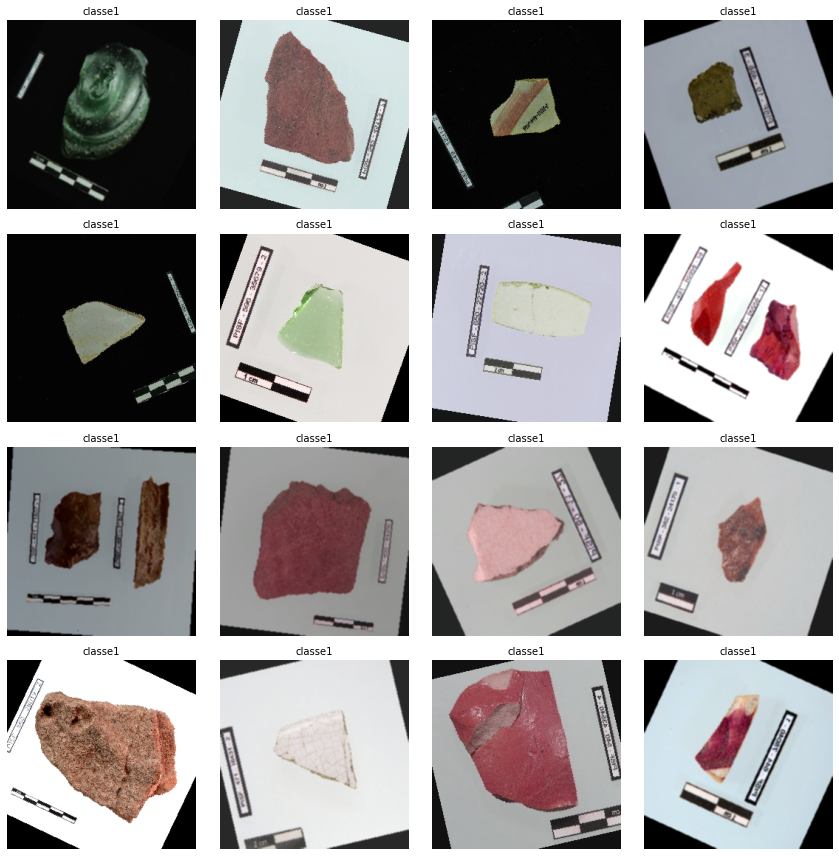

In [21]:
# Usando create_all_loaders 
train_loader, val_loader, test_loader = create_all_loaders(
    train_dir=train_dir,
    test_dir=test_dir,
    classes=classes,
    preprocess_fn=aug_transform,  # Aqui passamos o pipeline de augmentação
    batch_size=32,
)

# Visualiza um lote de imagens do dataset de treino com as augmentações
visualize_dataset(train_loader, class_names=["classe1", "classe2", "classe3"], num_images=16,
                   mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

<Figure size 432x288 with 0 Axes>

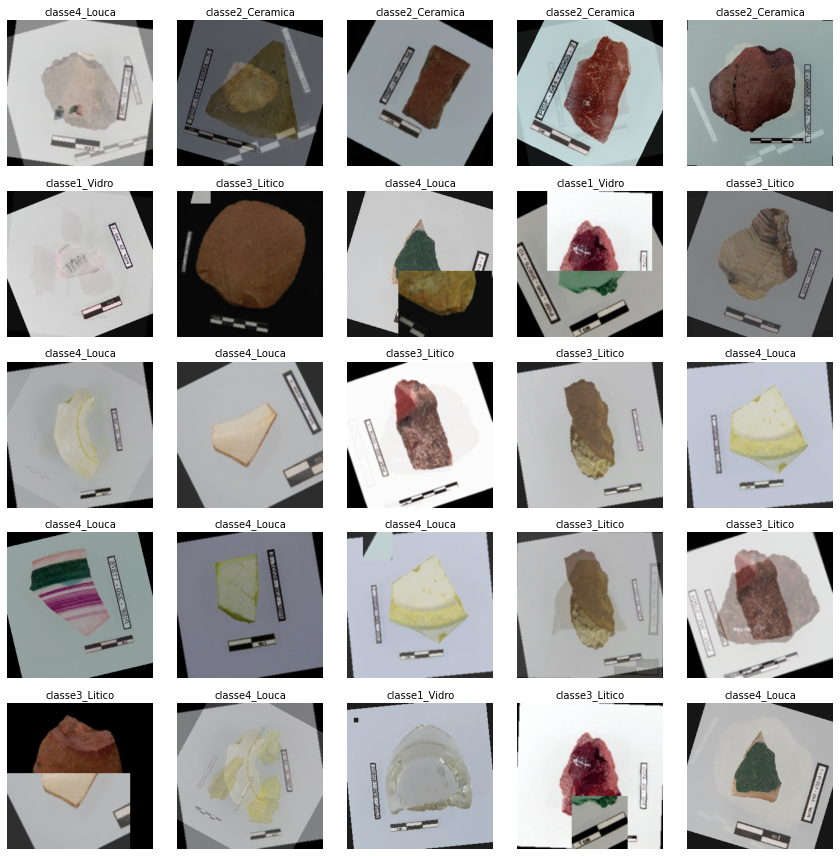

In [22]:
from timm.data import Mixup

num_classes = len(classes)

# Configura o Mixup/CutMix
mixup_fn = Mixup(
    mixup_alpha=0.3,         # Habilita Mixup com alpha
    cutmix_alpha=0.3,        # Habilita CutMix com alpha
    cutmix_minmax=None,      # Opcional: define a razão mínima/máxima para CutMix
    prob=1.0,                # Probabilidade de aplicar Mixup ou CutMix
    switch_prob=0.5,         # Probabilidade de alternar para CutMix quando ambos estão habilitados
    mode='elem',             # Modo de aplicação ('batch', 'pair', 'elem')
    label_smoothing=0.1,     # Suavização de rótulos
    num_classes=num_classes
)

# Obter um batch do DataLoader de treino com augmentação
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Aplicar Mixup/CutMix ao batch
images_mixup, labels_mixup = mixup_fn(images, labels)

# Defina os parâmetros de normalização para visualização
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Visualizar as imagens mixadas
visualize_mixed_dataset(
    images=images_mixup,
    labels=labels_mixup,
    class_names=classes,
    mean=mean,
    std=std,
    num_images=25
)